# Long Short Term Memory

In [7]:
from whittaker_smooth import whittaker_smooth
from datetime import date

import matplotlib.pyplot as plt
import numpy as np
import utils

In [8]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/kansas'
bands =  ['B4','B3','B2','B8']

# Dictionaries of the images.
images_kansas19 = utils.load_landsat_image(BASE_DIR + '19', bands)
images_kansas20 = utils.load_landsat_image(BASE_DIR + '20', bands)
images_kansas21 = utils.load_landsat_image(BASE_DIR + '21', bands)
images_kansas22 = utils.load_landsat_image(BASE_DIR + '22', bands)

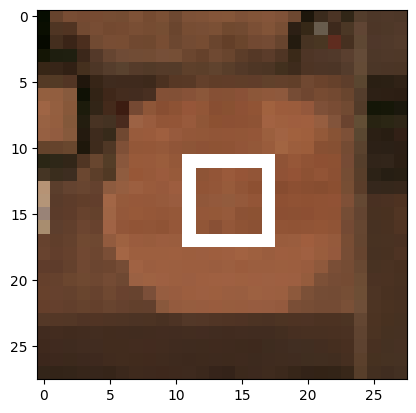

In [9]:
# Get the days after plant and the dates.
days_19, dates_19, hours_19 = utils.images_time_info(images_kansas19.keys(), initial_date = date(2019, 4, 5))
days_20, dates_20, hours_20 = utils.images_time_info(images_kansas20.keys(), initial_date = date(2020, 4, 4))
days_21, dates_21, hours_21 = utils.images_time_info(images_kansas21.keys(), initial_date = date(2021, 4, 2))
days_22, dates_22, hours_22 = utils.images_time_info(images_kansas22.keys(), initial_date = date(2022, 4, 2))

# Calculate the NDVI series over the crops.
ndvi_series_19 = utils.generate_ndvi_time_series(images_kansas19)
ndvi_series_20 = utils.generate_ndvi_time_series(images_kansas20)
ndvi_series_21 = utils.generate_ndvi_time_series(images_kansas21)
ndvi_series_22 = utils.generate_ndvi_time_series(images_kansas22)

In [10]:
# Apply a Whittaker Smooth filter.
ndvi_smooth_19 = whittaker_smooth(np.array(ndvi_series_19), lmbd=10)
ndvi_smooth_20 = whittaker_smooth(np.array(ndvi_series_20), lmbd=10)
ndvi_smooth_21 = whittaker_smooth(np.array(ndvi_series_21), lmbd=10)
ndvi_smooth_22 = whittaker_smooth(np.array(ndvi_series_22), lmbd=10)

In [11]:
# Apply an interpolation by splines.
x_19, y_19 = utils.interpolate_curve(days_19, ndvi_smooth_19)
x_20, y_20 = utils.interpolate_curve(days_20, ndvi_smooth_20)
x_21, y_21 = utils.interpolate_curve(days_21, ndvi_smooth_21)
x_22, y_22 = utils.interpolate_curve(days_22, ndvi_smooth_22)

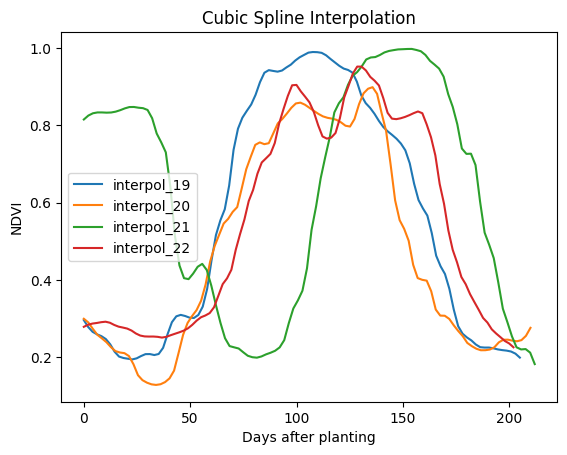

In [12]:
plt.plot(x_19, y_19, label='interpol_19')
plt.plot(x_20, y_20, label='interpol_20')
plt.plot(x_21, y_21, label='interpol_21')
plt.plot(x_22, y_22, label='interpol_22')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Days after planting')
plt.ylabel('NDVI')
plt.legend()
plt.show()